In [1]:
import matplotlib.pyplot as plt
import numpy
import scipy
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [2]:
n_dim = 100
true_mu = numpy.random.uniform(-1, 1, n_dim)

random_vector = numpy.random.uniform(0, 1, (n_dim, 1))
random_diag = numpy.identity(n_dim) * numpy.outer(numpy.ones(n_dim), random_vector)
random_mat = numpy.random.uniform(0, 1, (n_dim, n_dim))
ortho_mat = scipy.linalg.orth(random_mat)
true_cov = ortho_mat.T @ random_diag @ ortho_mat

z_true_pdf = scipy.stats.multivariate_normal(mean=true_mu, cov=true_cov)

In [3]:
n_pop = 100_000
z_pop = z_true_pdf.rvs(n_pop)
x_pop = (z_pop**2).sum(axis=1)
x_true_pdf = scipy.stats.gaussian_kde(x_pop)

<AxesSubplot:>

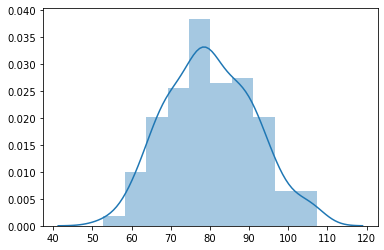

In [4]:
x_sample = x_pop[:200]
p = scipy.stats.gaussian_kde(x_sample)
sns.distplot(x_sample)

In [5]:
mu_sample = x_sample.mean()
std_sample = x_sample.std()
transition = lambda x: numpy.random.normal(x, std_sample)
# q_dist = scipy.stats.norm(loc=mu_sample, scale=std_sample)
# q = lambda x: q_dist.rvs(1)
q = lambda x: scipy.stats.norm(loc=x, scale=std_sample).rvs(1)

In [6]:
def accept(x_new, x):
    u = numpy.random.uniform(0, 1)
    return u < (p.pdf(x_new) * q(x)) / (p.pdf(x) * q(x_new))

In [7]:
def metropolis_hastings(n_iter, ):
    x = 0 # initial state
    samples = []
    for i in range(n_iter):
        x_new = transition(x)
        if accept(x_new, x):
            x = x_new
        samples.append(x)
    return numpy.array(samples)

In [8]:
new_samples = metropolis_hastings(10000)

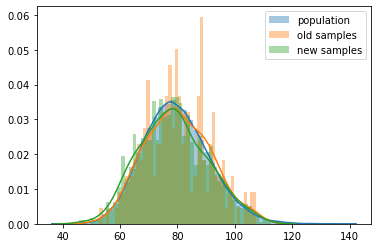

In [9]:
sns.distplot(x_pop, bins=50, label="population")
sns.distplot(x_sample, bins=50, label="old samples")
picked_new_samples = new_samples[new_samples.size//3:]
picked_new_samples = picked_new_samples[1::5]
sns.distplot(picked_new_samples, bins=50, label="new samples")
plt.legend()

In [10]:
scipy.stats.normaltest(picked_new_samples)

NormaltestResult(statistic=14.727025582288135, pvalue=0.0006339675478813901)

In [11]:
scipy.stats.shapiro(picked_new_samples)

ShapiroResult(statistic=0.9950301051139832, pvalue=0.0002158572169719264)

In [14]:
scipy.stats.kstest(picked_new_samples, x_true_pdf)

KstestResult(statistic=0.9990504036307187, pvalue=0.0)